In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.io.wavfile as wavfile

In [3]:
# frequency of interest
f = 440

# delay between microphones
def Fn(n, d, theta):
    # assuming planar wavefront
    c = 343
    return (n)*d*np.cos(theta/180*np.pi)/c




In [112]:

# import wav files
fs, data = wavfile.read('beamforming_test_30_maybe.wav')




[136 136 136 ... 134 135 135]


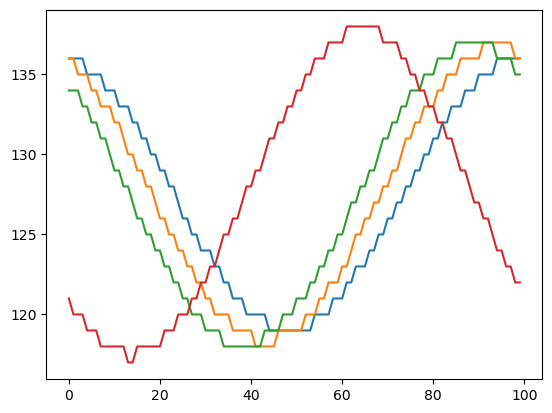

In [113]:
print(data[:,0])

# plot wav files
plt.plot(data[0:100,0])
plt.plot(data[0:100,1])
plt.plot(data[0:100,2])
plt.plot(data[0:100,7])


In [114]:
# beamforming delay and sum

y=np.zeros((1,len(data)))


for n in range(8):
    # delay and sum
    
    y += np.roll(data[:,n], int(Fn(n, 0.05, 90)*fs))
    

y = y/8




[0.06452879-0.04634325j 0.06452879-0.04634325j 0.06452879-0.04634325j ...
 0.06452879+0.04634325j 0.06452879+0.04634325j 0.06452879+0.04634325j]


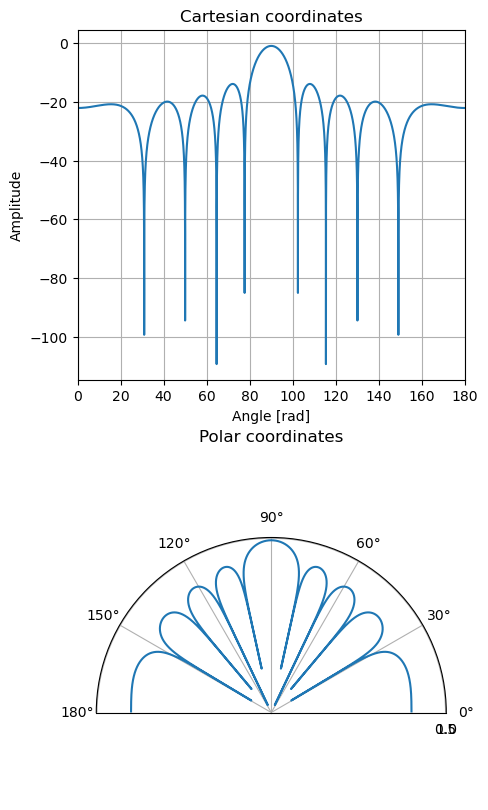

<Figure size 640x480 with 0 Axes>

In [4]:

phi = np.linspace(0, np.pi, 100000)
f = 2000
c = 343
d = 0.08
N = 11
theta = 90/180*np.pi
#A = (np.sin(N*np.pi*f*d*(np.cos(phi)-np.cos(theta))/c))/(N*np.sin(np.pi*f*d*(np.cos(phi)-np.cos(theta))/c))

A = np.zeros(len(phi), dtype=complex)
for n in range(1, N):
    #A += np.exp(-1j*2*np.pi*(n-1)*f*d*(np.cos(phi)-np.cos(theta))/c)
    A += (np.exp(1j*2*np.pi*(n-1)*f*d*np.cos(theta)/c))*(np.exp(-1j*2*np.pi*(n-1)*f*d*np.cos(phi)/c))
A=A/N
print(A)
# plot subfigure in cartesian coordinates and polar coordinates
fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_subplot(211)
ax1.plot(phi*180/np.pi, 20*np.log10(np.abs(A)))
ax1.set_xlabel('Angle [rad]')
ax1.set_ylabel('Amplitude')
ax1.set_title('Cartesian coordinates')
ax1.set_xlim([0, 180])
ax1.grid(True)
ax2 = fig.add_subplot(212, projection='polar')
ax2.plot(phi, 20*np.log10(np.abs(A)))
ax2.set_title('Polar coordinates')
ax2.set_thetamin(0)
ax2.set_thetamax(180)
ax2.set_rticks([0.5, 1])
ax2.set_rlabel_position(-22.5)
ax2.grid(True)
plt.show()
plt.tight_layout()



1.0

In [115]:
# write wav file
wavfile.write('beamforming_test_30_maybe_out.wav', fs, y.T.astype(np.int16).flatten())

In [116]:
print((y.T.astype(np.int16)).flatten().flatten()[0:100])

[129 129 129 128 128 127 127 126 126 126 125 125 125 124 124 123 123 122
 122 122 122 122 121 121 121 121 120 120 120 120 120 120 120 120 120 121
 120 121 121 121 121 121 122 122 122 123 123 123 124 124 125 125 125 126
 126 127 127 128 128 129 129 129 130 130 131 131 131 131 132 132 132 133
 133 133 133 134 134 134 134 134 134 134 134 134 134 134 134 134 133 133
 133 133 132 132 132 132 131 131 130 130]


In [78]:
print(y.T[0:100])
print(data[0:100,0])

[[126.875]
 [126.875]
 [127.125]
 [127.25 ]
 [127.375]
 [127.625]
 [127.625]
 [127.625]
 [127.75 ]
 [127.875]
 [127.875]
 [128.   ]
 [128.125]
 [128.25 ]
 [128.25 ]
 [128.5  ]
 [128.625]
 [128.625]
 [128.625]
 [128.75 ]
 [128.875]
 [128.875]
 [128.875]
 [129.   ]
 [129.   ]
 [129.   ]
 [129.125]
 [129.125]
 [129.125]
 [129.   ]
 [129.   ]
 [129.   ]
 [129.   ]
 [129.   ]
 [129.   ]
 [129.   ]
 [129.   ]
 [129.   ]
 [129.   ]
 [129.   ]
 [129.   ]
 [128.75 ]
 [128.75 ]
 [128.75 ]
 [128.75 ]
 [128.625]
 [128.5  ]
 [128.5  ]
 [128.375]
 [128.25 ]
 [128.25 ]
 [128.125]
 [128.125]
 [128.   ]
 [127.875]
 [127.75 ]
 [127.625]
 [127.5  ]
 [127.375]
 [127.25 ]
 [127.25 ]
 [127.125]
 [127.   ]
 [127.   ]
 [126.75 ]
 [126.625]
 [126.625]
 [126.5  ]
 [126.5  ]
 [126.5  ]
 [126.375]
 [126.25 ]
 [126.25 ]
 [126.25 ]
 [126.125]
 [126.125]
 [126.125]
 [126.125]
 [126.   ]
 [126.   ]
 [126.   ]
 [126.   ]
 [126.   ]
 [126.   ]
 [126.   ]
 [126.   ]
 [126.   ]
 [126.   ]
 [126.125]
 [126.125]
 [126.25 ]

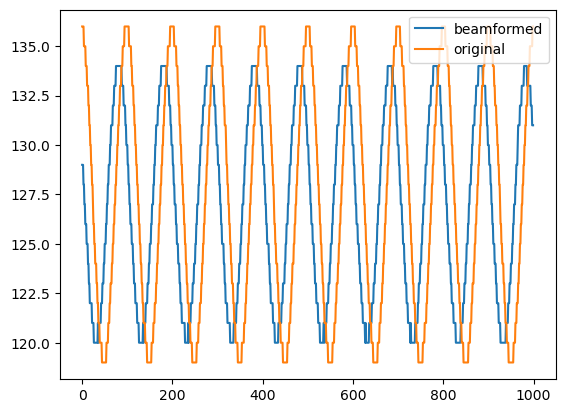

In [117]:
plt.figure()
plt.plot(y.T[0:1000].astype(np.int16).flatten(), label='beamformed')
plt.plot(data[0:1000,0], label='original')
plt.legend()

In [108]:
for n in range(8):
    # delay and sum
    print("index",n)  
    print( int(Fn(n, 0.05, 90)*fs))

index 0
0
index 1
0
index 2
0
index 3
0
index 4
0
index 5
0
index 6
0
index 7
0


In [105]:
np.cos(np.pi)

-1.0